In [281]:
import pandas as pd
import numpy as np

In [245]:
train = pd.read_csv('train.csv', usecols = ['Age', 'Survived', 'Fare'])

In [247]:
x = train.iloc[:, 1:]
y = train.iloc[:, 0:1]

In [249]:
from sklearn.model_selection import train_test_split as split

In [250]:
train_x, test_x, train_y, test_y = split(x, y, test_size = 0.2)

In [261]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [262]:
trasformer = ColumnTransformer(transformers=[
    ('tnf', SimpleImputer(strategy='mean'), ['Age']),
    ('tnf2', StandardScaler(), ['Fare'])

], remainder='passthrough')

In [263]:
current_train_x = trasformer.fit_transform(train_x)

In [264]:
current_test_x = trasformer.fit_transform(test_x)

In [265]:
new_train_x = pd.DataFrame(current_train_x, columns = ['Age', 'Fare'])
new_test_x = pd.DataFrame(current_test_x, columns = ['Age', 'Fare'])

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Age is Already Normalised so dont need to Transform the function

<ipython-input-268-c482dc3cfb7e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Age'], ax = fig1)


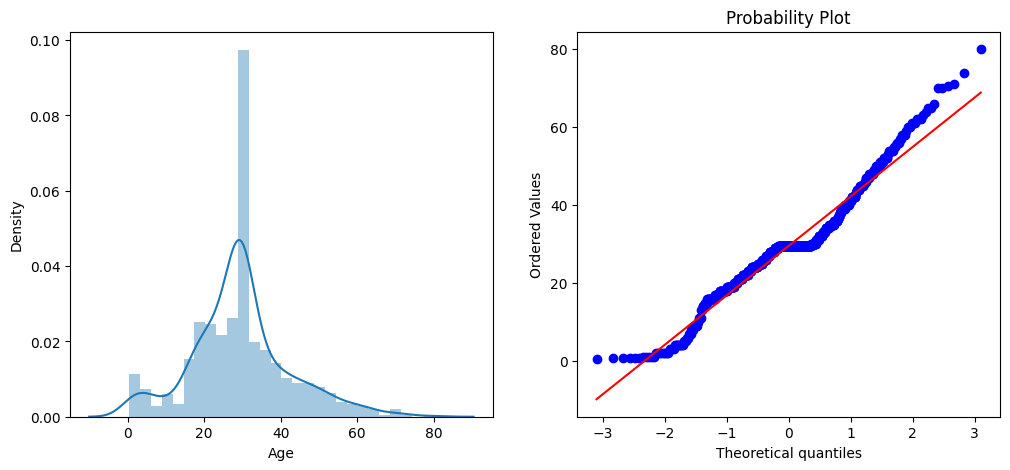

In [268]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Age'
sns.distplot(new_train_x['Age'], ax = fig1)
fig1.set_title='QQ PLOT'
stats.probplot(new_train_x['Age'], plot = fig2)
plt.show()

# Fare is not Normalised so i Need to Transform the function

<ipython-input-269-9e242ebae929>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Fare'], ax = fig1)


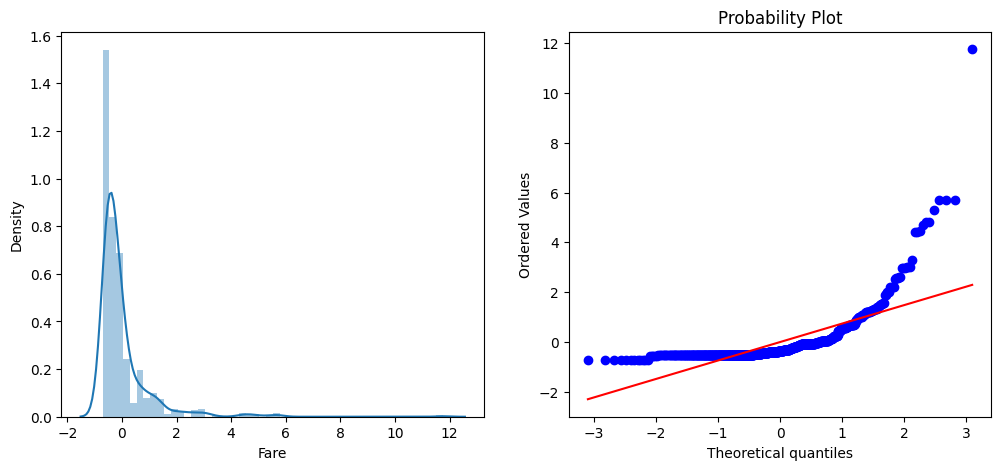

In [269]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Fare'
sns.distplot(new_train_x['Fare'], ax = fig1)
fig1.set_title='QQ PLOT'
stats.probplot(new_train_x['Fare'], plot = fig2)
plt.show()

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as score

# Without Transformation

In [272]:
class1 = LogisticRegression()

In [273]:
class1.fit(new_train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [276]:
pred_y1 = class1.predict(new_test_x)

In [279]:
print('Accuracy score : ', score(pred_y1, test_y))

Accuracy score :  0.6312849162011173


# With Function Transformation

In [280]:
from sklearn.preprocessing import FunctionTransformer

In [282]:
transformer = FunctionTransformer(func = np.log1p)
#transformer = FunctionTransformer(func=np.sqrt)
#transformer = FunctionTransformer(func=np.exp)
#transformer = FunctionTransformer(func=np.abs)
#transformer = FunctionTransformer(func=lambda x: np.power(x, 3))

In [283]:
transformed_train_x = transformer.fit_transform(new_train_x)

In [284]:
transformed_test_x = transformer.transform(new_test_x)

In [285]:
class2 = LogisticRegression()

In [286]:
class2.fit(transformed_train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [287]:
pred_y2 = class2.predict(transformed_test_x)

In [288]:
print('Accuracy Score : ', score(pred_y2, test_y))

Accuracy Score :  0.6759776536312849


<ipython-input-290-18beee8da2bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Fare'], ax = fig1)
<ipython-input-290-18beee8da2bb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_train_x['Fare'], ax = fig2)


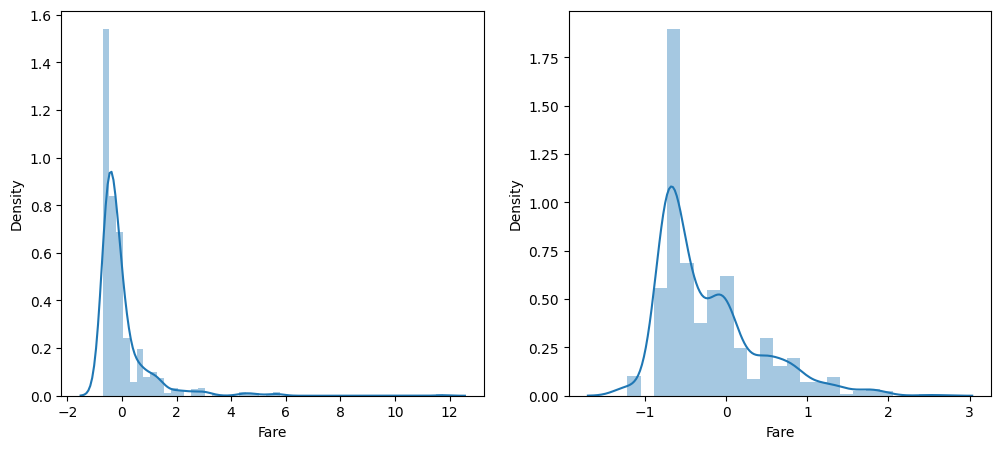

In [290]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Before'
sns.distplot(new_train_x['Fare'], ax = fig1)
fig1.set_title='After'
sns.distplot(transformed_train_x['Fare'], ax = fig2)
plt.show()

In [292]:
from sklearn.model_selection import cross_val_score

In [294]:
print('Cross Validation Score : ', np.mean(cross_val_score(class2, transformed_train_x, train_y, scoring='accuracy', cv = 10)))

Cross Validation Score :  0.6796752738654147


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [295]:
print('Cross Validation Score : ', np.mean(cross_val_score(class2, new_train_x, train_y, scoring='accuracy', cv = 10)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score :  0.6586463223787168


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
